<a href="https://colab.research.google.com/github/YoneDelCastillo/Nonlinear-Maxwells-Eq.-FDTD/blob/main/TFG_2D_dispersi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MODULOS DE PYTHON

#Librerías:
#Para cálculos y gráficas:
import numpy as np
import matplotlib.pyplot as plt
#Para la animación:
import matplotlib.animation as animation

#FUNCIONES ÚTILES
def Gauss(x,y,x0,y0,a,b):
  return np.exp(-(x-x0)**2/(2*a**2)-(y-y0)**2/(2*b**2))

In [ ]:
#DEFINICION DE VARIABLES Y PARAMETROS

#Número de puntos espaciales
Lx = 2
dx = 0.02
Ly = 1
dy = 0.02

Nx = int(Lx/dx)+2
Ny = int(Ly/dy)+2

#Número de intervalos temporales
T = 2.5
dt = 0.0001

Nt = int(T/dt)

#Constantes
#τ_p
t_p = 0.1
# ε
e = 1.75
# ε_∞
e_i = 1
# μ
u = 1.75
#c
c = 1/np.sqrt(e*u)

#Constantes
#τ_p
#t_p = 0.5
# ε
#e = 2
# ε_∞
#e_i = 1.5
# μ
#u = 1


#Δε_p
De = e - e_i

#______________
#Medio de Debye
#χ
def Chi(m,De,dt,t_p):
  chi = De*(1-np.exp(-dt/t_p))*np.exp(-m*dt/t_p)
  return chi
#ξ
def Xi(m,De,dt,t_p):
  xi = (De*t_p/dt)*(1 - (dt/t_p + 1)*np.exp(-dt/t_p))*np.exp(-m*dt/t_p)
  return xi
#______________
#Medio de ??
#χ

#ξ

#______________

#Δχ_0
D_Chi_0 = Chi(0,De,dt,t_p)-Chi(1,De,dt,t_p)
#Δξ_0
D_Xi_0 = Xi(0,De,dt,t_p)-Xi(1,De,dt,t_p)
#α
a = (e_i-Xi(0,De,dt,t_p))/(e_i-Xi(0,De,dt,t_p)+Chi(0,De,dt,t_p))
#β
b = (dt/e)/(e_i-Xi(0,De,dt,t_p)+Chi(0,De,dt,t_p))
#γ
g = 1/(e_i-Xi(0,De,dt,t_p)+Chi(0,De,dt,t_p))

#Definicion de los campos
Ex = np.zeros((Ny,Nx,Nt))
Ey = np.zeros((Ny,Nx,Nt))
Hz = np.zeros((Ny,Nx,Nt))

Psi_x = np.zeros((Ny,Nx))
Psi_y = np.zeros((Ny,Nx))

Kx = 2*np.pi/(0.15*Lx)

#Imponemos las CONDICIONES INICIALES a Ey y Hz
#Al mismo tiempo estamos imponiendo las condiciones de contorno de pozo de potencial infinito

# PULSO PLANO
for j in np.arange(1,Ny-1):
  for i in np.arange(1,Nx-1):
    Ey[j,i,0] = Gauss(      i*dx,(j+1/2)*dy,0.2*Lx,0.5*Ly,0.08,0.2)*np.cos(Kx*(      i*dx-0.2*Lx))
    Hz[j,i,0] = Gauss((i+1/2)*dx,(j+1/2)*dy,0.2*Lx,0.5*Ly,0.08,0.2)*np.cos(Kx*((i+1/2)*dx-0.2*Lx))

"""
#ONDA ESFÉRICA
for j in np.arange(1,Ny-1):
  for i in np.arange(1,Nx-1):
    Ey[j,i,0] =  (i*dx - 0.25*Lx)/np.sqrt( (i*dx - 0.25*Lx)**2 + ((j+1/2)*dy - 0.5*Ly)**2 )*Gauss((i+1/2)*dx,j*dy,0.25*Lx,0.5*Ly,0.16,0.16,1)*np.sin(Kx*np.sqrt( ((i+1/2)*dx - 0.25*Lx)**2 + (j*dy - 0.5*Ly)**2 ))
    Ex[j,i,0] = -(j*dx - 0.50*Ly)/np.sqrt( ((i+1/2)*dx - 0.25*Lx)**2 + (j*dy - 0.5*Ly)**2 )*Gauss((i+1/2)*dx,j*dy,0.25*Lx,0.5*Ly,0.16,0.16,1)*np.sin(Kx*np.sqrt( (i*dx - 0.25*Lx)**2 + ((j+1/2)*dy - 0.5*Ly)**2 ))
    Hz[j,i,0] =  Gauss((i+1/2)*dx,(j+1/2)*dy,0.25*Lx,0.5*Ly,0.1,0.1,1)
"""
#Parámetros de la geomatría
geometria = True

ang = np.radians(65)  #Ángulo con respecto al eje x
X0 = 0.4*Nx           #Distancia al origen

#Frontera
x = np.arange(0,Nx+0.1,0.1)
y = np.tan(ang)*(x-X0)

#Array
geo = np.zeros((Ny,Nx),dtype="bool")

for j in np.arange(0,Ny):
  for i in np.arange(0,Nx):
    geo[j,i] = j <= np.tan(ang)*(i-X0)

no_geo = ~geo

print(f"Dimensiones del retículo: {Nx}x{Ny}")
print(f"Kx = {round(Kx,2)} 1/L")

Dimensiones del retículo: 102x52
Kx = 20.94 1/L


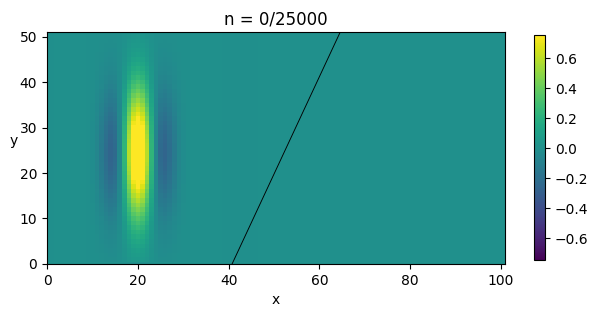

In [ ]:
#Representación de la condición inicial
plt.imshow(Ey[:,:,0],vmin=-0.75,vmax=0.75,origin="lower",interpolation="none")
plt.plot(x,y,"k-",linewidth=0.65)

plt.xlabel("x")
plt.ylabel("y",rotation=0)
plt.title(f"n = 0/{Nt}")#plt.title(f"k$_x$ = {round(Kx,2)} "+" $\dfrac{rad}{L}$")
plt.colorbar(shrink=Ly/Lx)


plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)
plt.tight_layout()

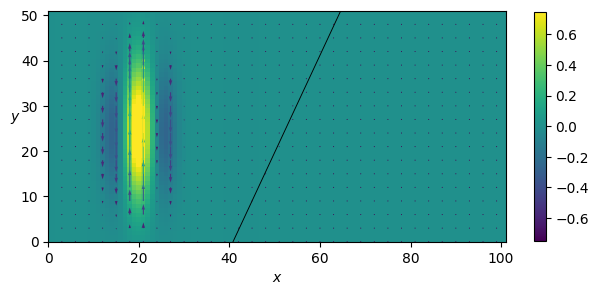

In [ ]:
#Graficado del campo vectorial
S = 3 #Número puntos que se salta para la representación

X,Y = np.meshgrid(np.arange(0,Nx-1,S),np.arange(0,Ny-1,S))

Ny_q, Nx_q = np.shape(X)
Ey_q = np.zeros((Ny_q,Nx_q,Nt))
Ex_q = np.zeros((Ny_q,Nx_q,Nt))


for j in np.arange(0,Ny_q):
  for i in np.arange(0,Nx_q):
    Ey_q[j,i,0] = Ey[S*j,S*i,0]
    Ex_q[j,i,0] = Ex[S*j,S*i,0]

color = np.sqrt(Ex_q[:,:,0]**2+Ey_q[:,:,0]**2)
#color = Ey_q[:,:,0]+Ex_q[:,:,0]

plt.quiver(X,Y,Ex_q[:,:,0],Ey_q[:,:,0],color,scale=7,units="width")
#plt.imshow(geo,cmap="Greys_r",vmin=0,vmax=1,origin="lower")
#plt.imshow(np.sqrt(Ey[:,:,0]**2+Ex[:,:,0]**2),vmin=-0.75,vmax=0.75,origin="lower") #,alpha=geo
plt.imshow(Ey[:,:,0],vmin=-0.75,vmax=0.75,origin="lower")
plt.plot(x,y,"k-",linewidth=0.65)

#plt.title("Campo Eléctrico")
plt.colorbar(shrink=Ny/Nx)
#plt.clim(-0.75,0.75)
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)
plt.tight_layout()

plt.savefig("Condicion inicial.png",dpi=200)

In [ ]:
#ALGORITMO DE YEE

Ey_virtual_disp = np.zeros((Ny,Nx,2))
Ex_virtual_disp = np.zeros((Ny,Nx,2))

for n in np.arange(0,Nt-1):
  print(f"{round(n/(Nt-1)*100,1)}%",end='\r')
  # Crear copias de los arrays actuales
  Hz_virtual_disp        = Hz[:, :, n].copy()
  Ey_virtual_disp[:,:,0] = Ey[:, :, n].copy()
  Ex_virtual_disp[:,:,0] = Ex[:, :, n].copy()
  Hz_virtual_lin = Hz[:, :, n].copy()
  Ey_virtual_lin = Ey[:, :, n].copy()
  Ex_virtual_lin = Ex[:, :, n].copy()
  # Actualizamos los campos en la zona dispersiva
  Hz_virtual_disp[1:-1,1:-1] += - (dt/u)*((Ey_virtual_disp[1:-1,2:,0]-Ey_virtual_disp[1:-1,1:-1,0])/dx - (Ex_virtual_disp[2:,1:-1,0]-Ex_virtual_disp[1:-1,1:-1,0])/dy)
  Ex_virtual_disp[1:-1,1:-1,1] = a*Ex_virtual_disp[1:-1,1:-1,0] + b*( Hz_virtual_disp[1:-1,1:-1]-Hz_virtual_disp[:-2,1:-1])/dy + g*Psi_x[1:-1,1:-1]
  Ey_virtual_disp[1:-1,1:-1,1] = a*Ey_virtual_disp[1:-1,1:-1,0] - b*( Hz_virtual_disp[1:-1,1:-1]-Hz_virtual_disp[1:-1,:-2])/dx + g*Psi_y[1:-1,1:-1]
  Psi_x[1:-1,1:-1] = (D_Chi_0 - D_Xi_0)*Ex_virtual_disp[1:-1,1:-1,1] + D_Xi_0*Ex_virtual_disp[1:-1,1:-1,0] + Psi_x[1:-1,1:-1]*np.exp(-dt/t_p)
  Psi_y[1:-1,1:-1] = (D_Chi_0 - D_Xi_0)*Ey_virtual_disp[1:-1,1:-1,1] + D_Xi_0*Ey_virtual_disp[1:-1,1:-1,0] + Psi_y[1:-1,1:-1]*np.exp(-dt/t_p)
  # Actualizamos los campos en la zona lineal
  Hz_virtual_lin[1:-1,1:-1] += (dt)*((Ey_virtual_lin[1:-1,1:-1]-Ey_virtual_lin[1:-1,2:  ])/dx + (Ex_virtual_lin[2:,1:-1]-Ex_virtual_lin[1:-1,1:-1])/dy)
  Ey_virtual_lin[1:-1,1:-1] += (dt)*( Hz_virtual_lin[1:-1, :-2]-Hz_virtual_lin[1:-1,1:-1])/dx
  Ex_virtual_lin[1:-1,1:-1] += (dt)*( Hz_virtual_lin[1:-1,1:-1]-Hz_virtual_lin[ :-2,1:-1])/dy
  # Copiar los valores actualizados de vuelta a los arrays originales
  Hz[:, :, n+1] = no_geo*Hz_virtual_lin + geo*Hz_virtual_disp
  Ey[:, :, n+1] = no_geo*Ey_virtual_lin + geo*Ey_virtual_disp[:,:,1]
  Ex[:, :, n+1] = no_geo*Ex_virtual_lin + geo*Ex_virtual_disp[:,:,1]



In [ ]:
# CAMPO VECTORIAL
# Generar los índices directamente usando NumPy
indices_j = np.arange(0, Ny_q) * S
indices_i = np.arange(0, Nx_q) * S

# Bucle para n con la actualización del progreso
for n in range(Nt):
    print(f"{round(n/(Nt-1)*100,2)}%", end="\r")
    Ey_q[:, :, n] = Ey[np.ix_(indices_j, indices_i, [n])].squeeze()
    Ex_q[:, :, n] = Ex[np.ix_(indices_j, indices_i, [n])].squeeze()

color = np.sqrt(Ex_q**2 + Ey_q**2)

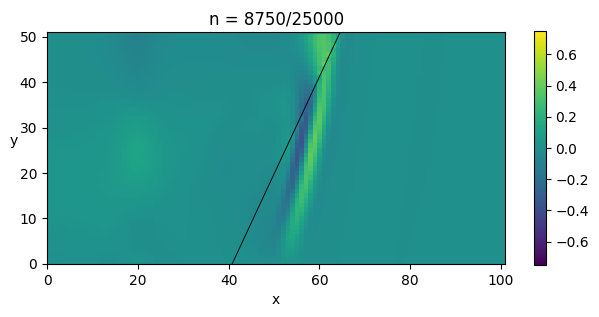

In [ ]:
#Visualización provisional
p = 0.35
t = int(p*Nt)

interpol = "none"

plt.imshow(Ey[:,:,t],vmin=-0.75,vmax=0.75,origin="lower",interpolation=interpol)
plt.colorbar(shrink=0.52)

plt.plot(x,y,"k-",linewidth=0.65)
plt.xlabel("x")
plt.ylabel("y",rotation=0)
plt.title(f"n = {t}/{Nt}")#plt.title(f"k$_x$ = {round(Kx,2)} "+"$ [L^{-1}]$")

plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)
plt.tight_layout()

campo = "Ey"

plt.savefig("%.2f.png"%(p),dpi=200,bbox_inches="tight")
#plt.savefig(f"{campo}_Disp_Interpol_{interpol}_Kx={round(Kx,2)}_Nx={Nx}_Ny={Ny}_n={t}_Nt={Nt}.png")

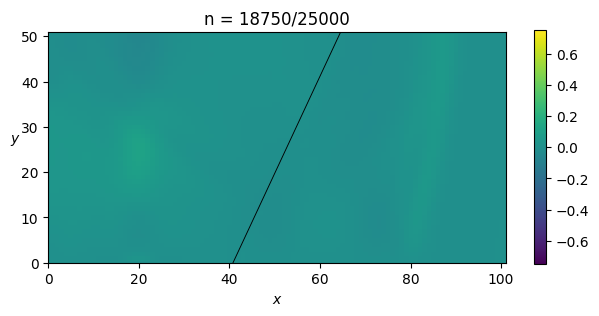

In [ ]:
#Graficado del campo vectorial
t = int(0.75*Nt)

#plt.imshow(geo,cmap="inferno",vmin=0,vmax=1,origin="lower")
plt.imshow(Ey[:,:,t],vmin=-0.75,vmax=0.75,origin="lower") #,alpha=geo
#plt.quiver(X,Y,Ex_q[:,:,t],Ey_q[:,:,t],color[:,:,t],scale=7,units="width")
plt.plot(x,y,"k-",linewidth=0.65)

plt.title(f"n = {t}/{Nt}")#plt.title("Campo Eléctrico")
plt.xlabel("$x$")
plt.ylabel("$y$",rotation=0)
plt.xlim(0,Nx-1)
plt.ylim(0,Ny-1)
plt.colorbar(shrink=0.52)
#plt.clim(-0.75,0.75)

plt.tight_layout()

plt.savefig(f"{campo}_Disp_Interpol_{interpol}_Kx={round(Kx,2)}_Nx={Nx}_Ny={Ny}_n={t}_Nt={Nt}.png",dpi=200,bbox_inches="tight")

In [ ]:
#                       ANIMACIÓN
# Configuración
T_anim = 15  # segundos
num_fps = 35
num_frames = T_anim * num_fps
Coef_prop = int(Nt / num_frames)
interpol = "none"

# Crear la figura y el eje
fig, ax = plt.subplots()

# Inicializar los gráficos
#quiver = ax.quiver(X, Y, Ex_q[:,:,0], Ey_q[:,:,0], color[:,:,0], scale=6, units="width")
#imshow = ax.imshow(np.sqrt( Ey[:,:,0]**2 + Ex[:,:,0]**2 ), interpolation=interpol, vmin=0.00, vmax=1.5, origin="lower")
imshow = ax.imshow(Ey[:,:,0], interpolation=interpol, vmin=-0.75, vmax=0.75, origin="lower")

# Definimos una función que crea un frame de la animación
def update_field(n):
    n = Coef_prop * n
    # Actualizar los datos del campo vectorial
    #quiver.set_UVC(Ex_q[:,:,n], Ey_q[:,:,n], color[:,:,n])
    # Actualizar los datos de la imagen
    #imshow.set_array(np.sqrt( Ey[:,:,n]**2 + Ex[:,:,n]**2 ))
    imshow.set_array(Ey[:,:,n])
    return quiver, imshow

# Configuración de los ejes
ax.plot(x,y,"k-",linewidth=0.65)
ax.set_xlim(0, Nx-1)
ax.set_ylim(0, Ny-1)
ax.set_title("Campo eléctrico")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.tight_layout()

# Añadir la barra de color
plt.colorbar(imshow, ax=ax, shrink=Ly/Lx, location="right", orientation="vertical")

# Crear la animación
ani = animation.FuncAnimation(fig, update_field, frames=num_frames, interval=int(1 / num_fps * 1000), blit=True)

#vGuardar la animación
campo = "Ey"

ani.save(f"{campo}_Disp_Interpol_{interpol}_Kx={round(Kx,2)}_Nx={Nx}_Ny={Ny}.mp4",fps=num_fps,dpi=200, extra_args=['-vcodec', 'libx264'])

plt.close()
